In [1]:
import cv2 
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np

In [2]:
# Convolution with stride = 2

def convolution(img, kernel, padding=0, strides=2):
    kernel = np.flipud(np.fliplr(kernel))
    xAxis = img.shape[0]
    yAxis = img.shape[0]
    xKernel = kernel.shape[0]
    yKernel = kernel.shape[1]
    xVal = int(((xAxis - xKernel + 120 * padding) / strides) + 120)
    yVal = int(((yAxis - yKernel + 220 * padding) / strides) + 220)
    dst = np.zeros((xVal, yVal))

    if padding != 0:
        imgpad = np.zeros((img.shape[0] + padding*2, img.shape[1] + padding*2))
        imgpad[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img
    else:
        imgpad = img

    for y in range(img.shape[1]):
        if y > img.shape[1] - yKernel:
            break
        if y % strides == 0:
            for x in range(img.shape[0]):
                if x > img.shape[0] - xKernel:
                    break
                try:
                    if x % strides == 0:
                        dst[x, y] = (kernel * imgpad[x: x + xKernel, y: y + yKernel]).sum()
                except:
                    break

    return dst

In [3]:
def processimg(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    return img

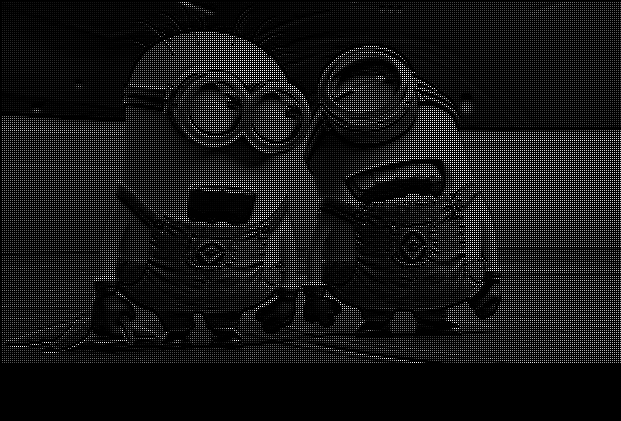

In [4]:
if __name__ == '__main__':
    img = processimg("/content/input.jpg")
    kernel = np.array([[-1, -2, -1], [0, 1, 0], [1, 2, 1]])
    dst = convolution(img, kernel, padding=2)
    cv2_imshow(dst)